<a href="https://colab.research.google.com/github/sarahmaddy/cse_430_ML1/blob/main/Lab_5_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_price.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2483 non-null   object 
 1   Open       2483 non-null   float64
 2   High       2483 non-null   float64
 3   Low        2483 non-null   float64
 4   Close      2483 non-null   float64
 5   Adj Close  2483 non-null   float64
 6   Volume     2483 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.9+ KB


In [8]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2483 non-null   datetime64[ns]
 1   Open       2483 non-null   float64       
 2   High       2483 non-null   float64       
 3   Low        2483 non-null   float64       
 4   Close      2483 non-null   float64       
 5   Adj Close  2483 non-null   float64       
 6   Volume     2483 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.9 KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_monthly=data.groupby(data['Date'].dt.to_period('M'))[['Open','High','Low','Close','Adj Close','Volume']].mean().reset_index()
data_monthly['Date']=data_monthly['Date'].dt.to_timestamp()
data_monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-01,2051.000000,2065.250000,2028.750000,2047.000000,1761.964343,7.314365e+07
1,2014-03-01,2102.750000,2123.000000,2078.750000,2102.750000,1809.951404,9.388545e+07
2,2014-04-01,2188.809524,2216.428571,2176.190476,2199.285714,1893.664115,8.776810e+07
3,2014-05-01,2231.666667,2262.222222,2213.333333,2234.722222,1936.752197,6.349269e+07
4,2014-06-01,2209.285714,2224.047619,2189.285714,2209.047619,1914.500930,5.227612e+07


<Axes: title={'center': 'Monthly BBCA Stock Price'}, xlabel='Date'>

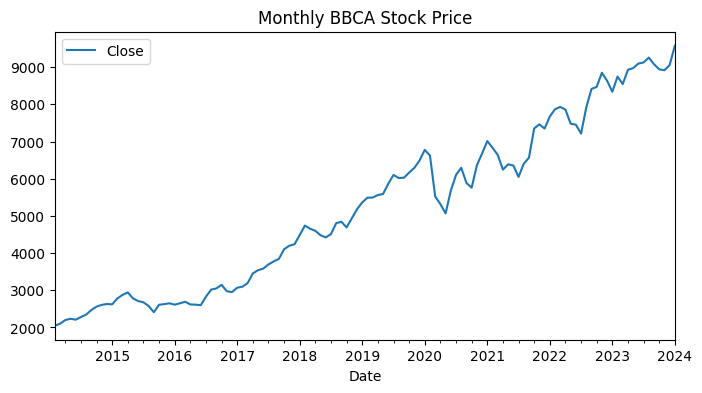

In [13]:
data_monthly.plot(x='Date',y='Close',kind='line',figsize=(8,4),title='Monthly BBCA Stock Price')

<Axes: title={'center': 'Monthly BBCA Stock Volume'}, xlabel='Date'>

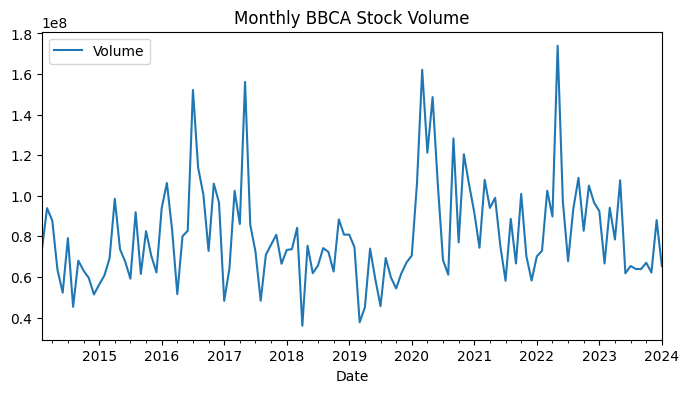

In [15]:
data_monthly.plot(x='Date',y='Volume',kind='line',figsize=(8,4),title='Monthly BBCA Stock Volume')

In [16]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

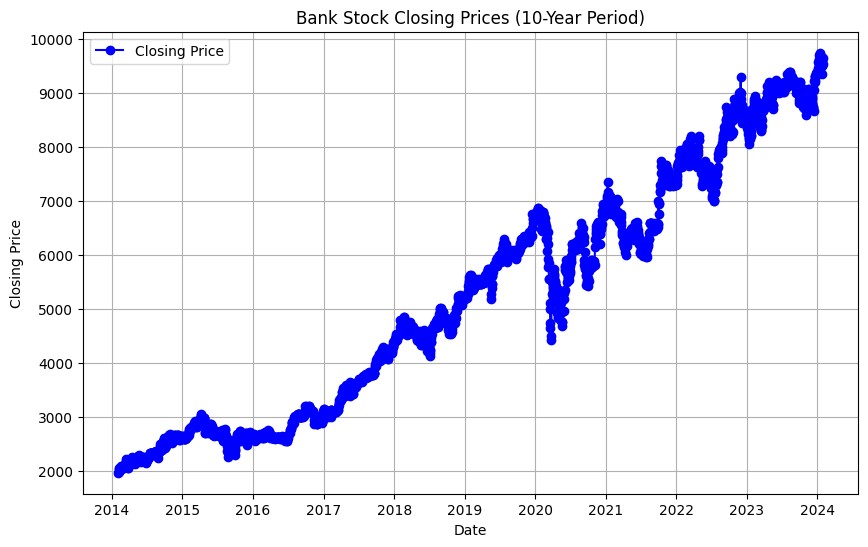

In [19]:
closing_prices = data['Close']
dates = pd.to_datetime(data['Date'])
# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(dates, closing_prices, marker='o', color='b', label='Closing Price')
plt.title("Bank Stock Closing Prices (10-Year Period)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.legend()

In [41]:
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y =data['Close']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [36]:
# Create and train Decision Tree model
from sklearn.tree import DecisionTreeRegressor

model1= DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
y_pred = model1.predict(X_test)

In [38]:
# Evaluate model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.312751677852349


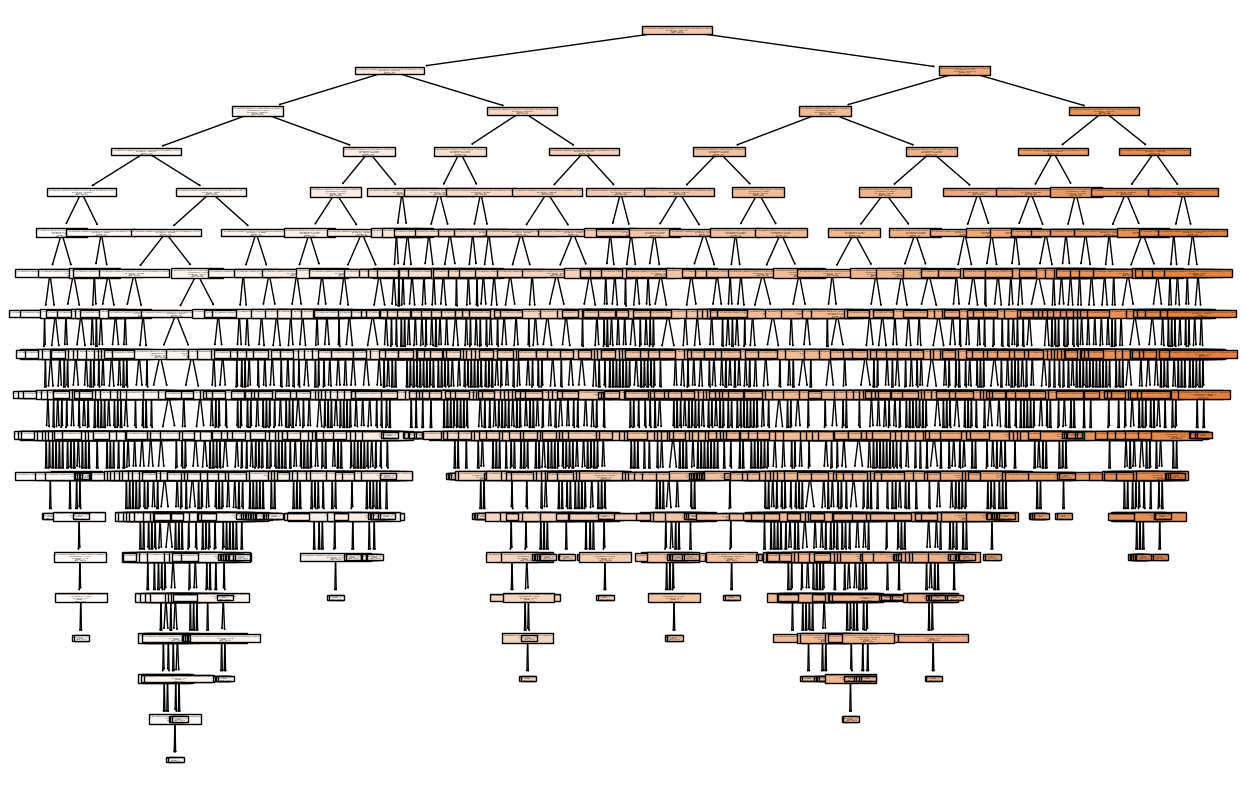

In [43]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model1, filled=True, feature_names=x)
plt.show()